In [1]:
from ultralytics import YOLO
import random
import cv2
import numpy as np

In [2]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:01<00:00, 46.2MB/s]


In [28]:
img = cv2.imread('../data/0a59be2e7dd53d6de11a10ce3649c081/thumbnail-new.jpg')

yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

In [29]:
img.shape

(385, 600, 3)

In [30]:
results = model.predict(img, 0.5)
colors = [random.choices(range(256), k=3) for _ in classes_ids]
print(results)

for result in results:
    if result.masks is not None and result.boxes is not None:  # Check if there are detections
        for mask, box in zip(result.masks.xy, result.boxes):
            points = np.int32(mask).reshape((-1, 1, 2))  # Ensure points are in the correct shape

            color_number = classes_ids.index(int(box.cls[0]))
            cv2.fillPoly(img, [points], colors[color_number])  # wrap points in a list
    else:
        print("No detections in this result.")

<generator object BasePredictor.stream_inference at 0x74c0c2be77d0>

0: 416x640 4 persons, 4 cars, 887.5ms
Speed: 2.3ms preprocess, 887.5ms inference, 13.6ms postprocess per image at shape (1, 3, 416, 640)


In [31]:
img.shape

(385, 600, 3)

In [32]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

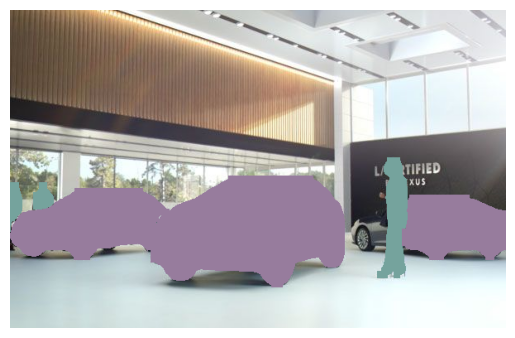

In [33]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()